In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
np.random.seed(0)
num = 30
X = np.random.uniform(0, 4, num)
y = np.sin(0.4*np.pi*X) + 0.4 * np.random.randn(num)
data = np.column_stack([X, y])

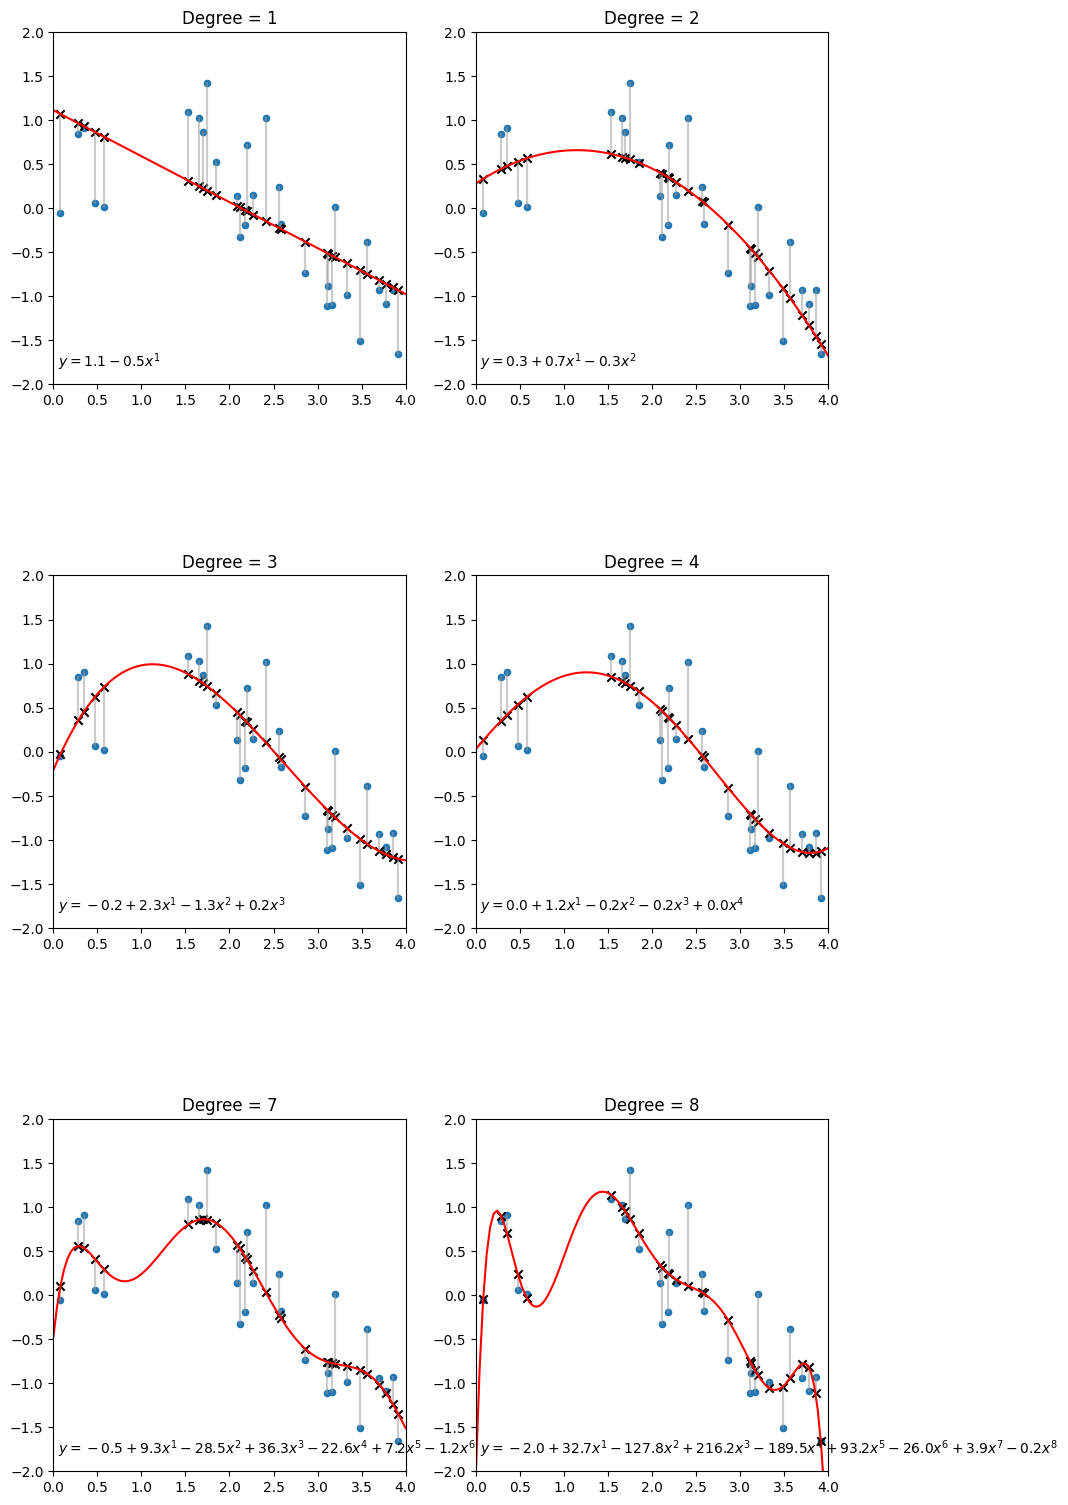

In [4]:
x_array = np.linspace(0,4,101).reshape(-1,1)
degree_array = [1,2,3,4,7,8]
fig, axes = plt.subplots(3,2,figsize=(10,20))
axes = axes.flatten()

for ax, degree_idx in zip(axes, degree_array):
    poly = PolynomialFeatures(degree=degree_idx)
    X_poly = poly.fit_transform(X.reshape(-1,1))

    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    y_poly_pred = poly_reg.predict(X_poly)
    data_ = np.column_stack([X, y_poly_pred])

    y_array_pred = poly_reg.predict(poly.fit_transform(x_array))
    ax.scatter(X, y, s=20)
    ax.scatter(X, y_poly_pred, marker='x', color='k')

    ax.plot(([i for (i, j) in data_], [i for (i,j) in data]),
       ([j for (i, j) in data_], [j for (i,j) in data]),
       c=[0.6,0.6,0.6], alpha=0.5)
    ax.plot(x_array, y_array_pred, color='r')
    ax.set_title('Degree = %d' % degree_idx)

    coef = poly_reg.coef_
    intercept = poly_reg.intercept_

    equation = '$y = {:.1f}'.format(intercept)
    for j in range(1, len(coef)):
        equation += ' + {:.1f}x^{}'.format(coef[j], j)
    equation += '$'
    equation = equation.replace('+ -', '-')
    ax.text(0.05, -1.8, equation)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(0, 4)
    ax.grid(False)
    ax.set_ylim(-2, 2)